In [1]:
# %load /cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func/base_imports.py
import pandas as pd
import numpy as np
import tqdm 
import glob
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import tarfile
import re
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
import sys
sys.path.append(r"/cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func")
from config import *
from functions import *

In [2]:
# Loading data
out_df_original = pd.read_csv(f'{SAVE_DIR}/{DIR_CSV}/{DIR_BRCA}/{NAME_TABLES}/{NAME_NON_FILTERING_BRCA}', sep="\t",low_memory=False)
out_df_filtered = pd.read_csv(f'{SAVE_DIR}/{DIR_CSV}/{DIR_BRCA}/{NAME_TABLES}/OHSU_BRCA_NEW/{NAME_FILTERING_BRCA}', sep=";",low_memory=False)

In [3]:
# Import requirements for fonts

matplotlib.rcParams.update({'font.size':4})
import math

In [4]:
# # Processing tables & save tables
first_df=out_df_filtered
second_df=out_df_original
final_df = first_df

# Adding sum for simple filtration
out_df_filtered.insert(loc=4,column='sum',value=final_df['size_intersection_coor']+final_df['size_ohsu\eth_coor']+final_df['size_eth\ohsu_coor'])

final_path = create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_BRCA,NAME_TABLES,'OHSU_BRCA_NEW',NAME_FINAL_BRCA])

final_df.to_csv(final_path,header=True,sep='\t')

/cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func/functions/table_processing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(['size_intersection', 'priority'], inplace = True,ascending = [False, True])


<Figure size 640x480 with 0 Axes>

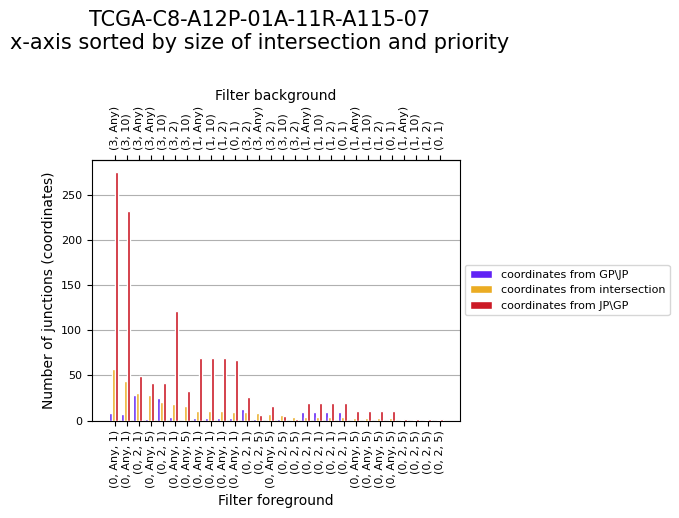

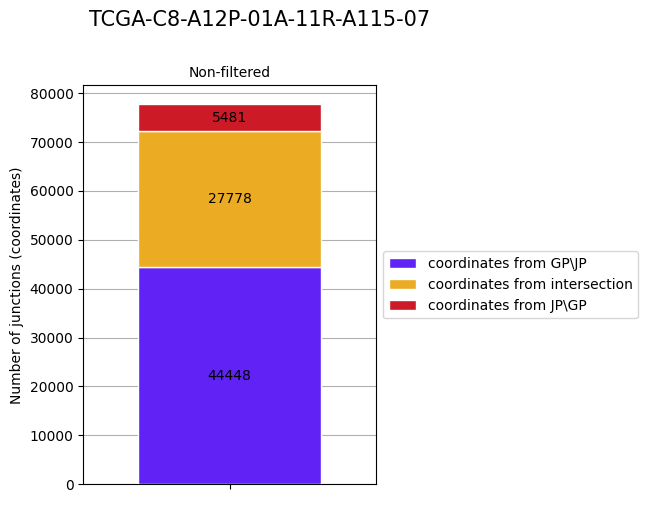

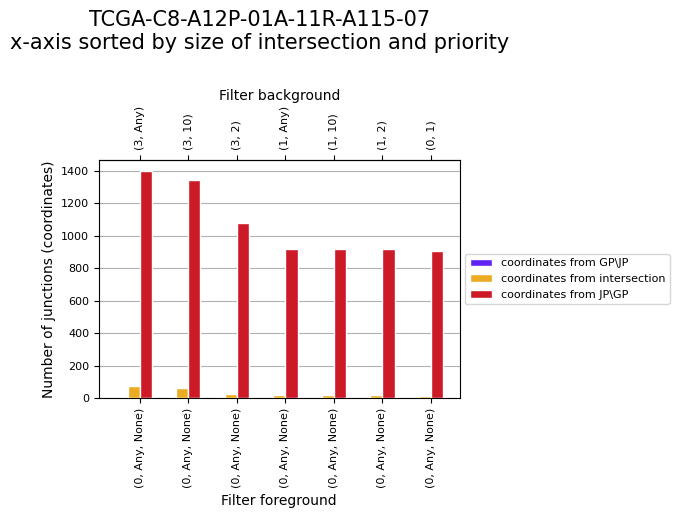

/cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func/functions/table_processing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(['size_intersection', 'priority'], inplace = True,ascending = [False, True])


<Figure size 640x480 with 0 Axes>

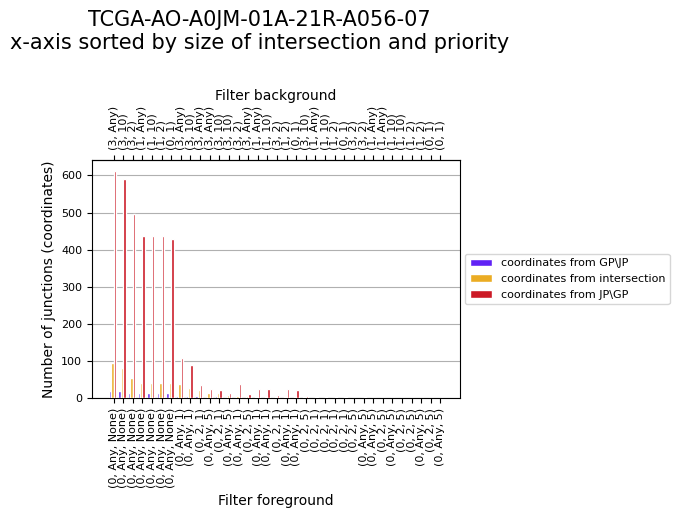

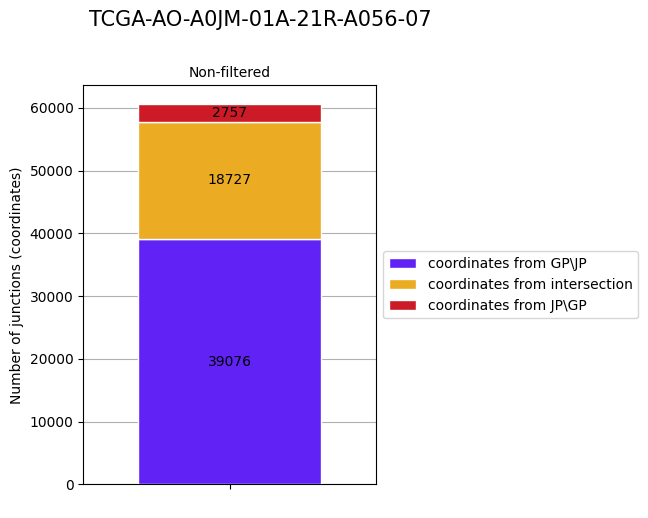

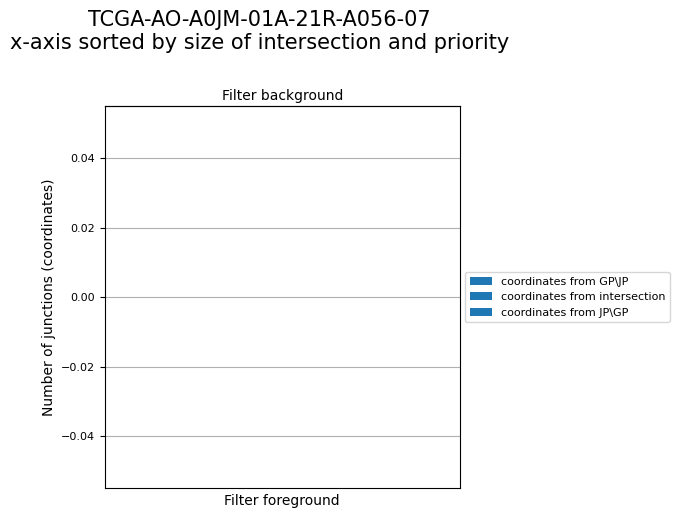

/cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func/functions/table_processing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(['size_intersection', 'priority'], inplace = True,ascending = [False, True])


<Figure size 640x480 with 0 Axes>

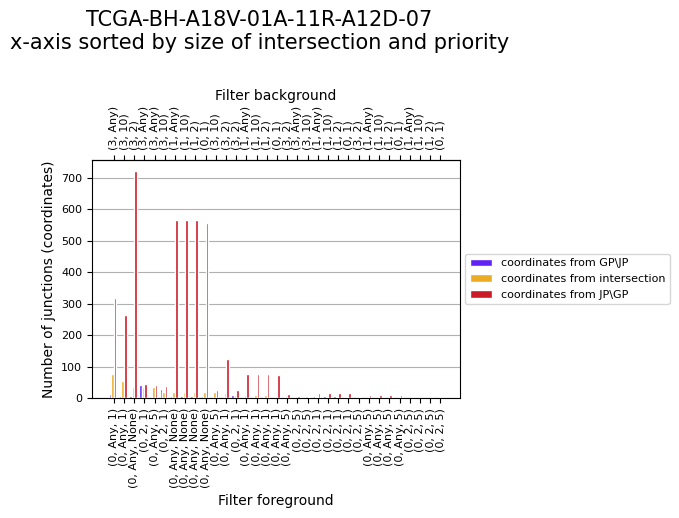

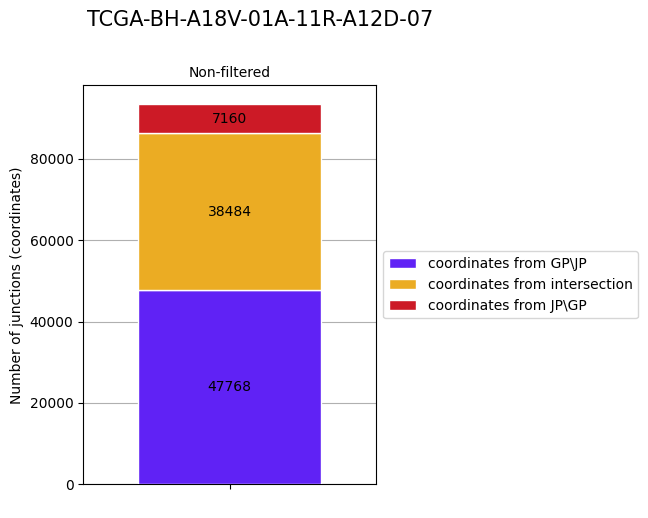

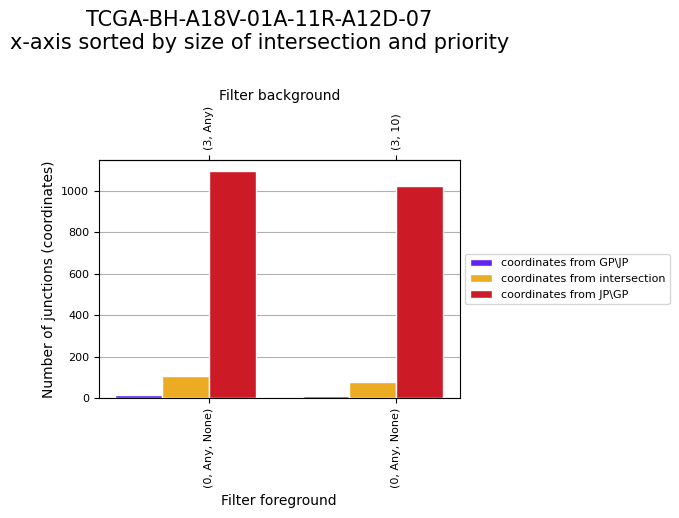

/cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func/functions/table_processing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(['size_intersection', 'priority'], inplace = True,ascending = [False, True])


<Figure size 640x480 with 0 Axes>

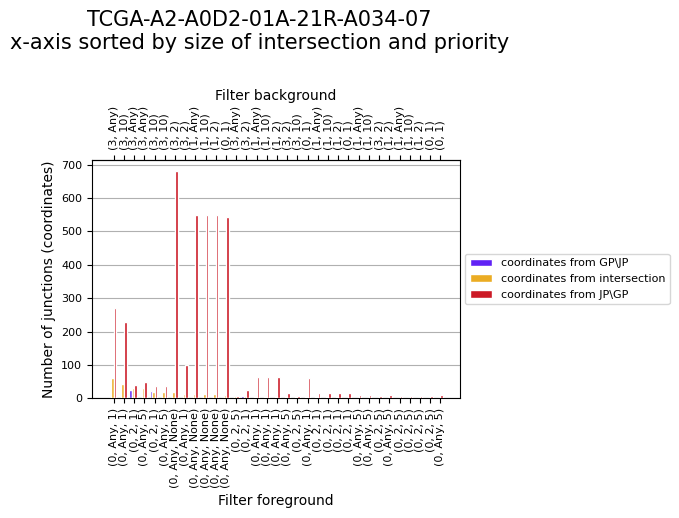

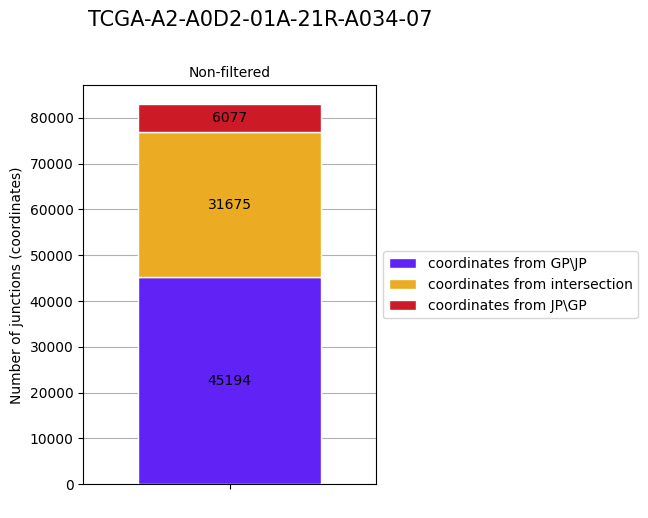

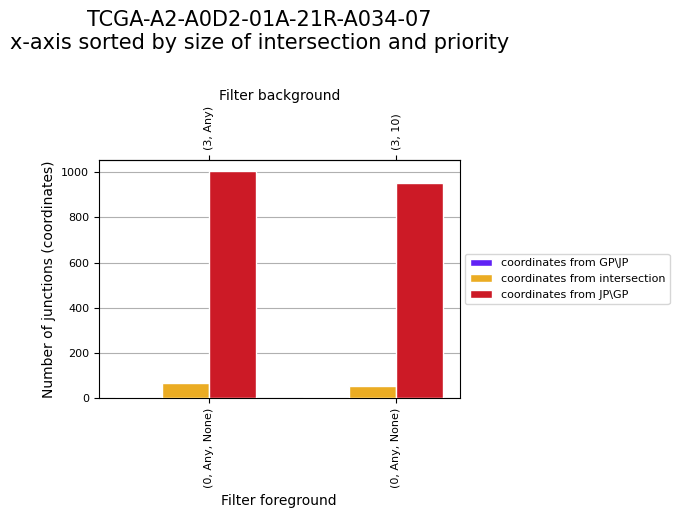

/cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func/functions/table_processing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(['size_intersection', 'priority'], inplace = True,ascending = [False, True])


<Figure size 640x480 with 0 Axes>

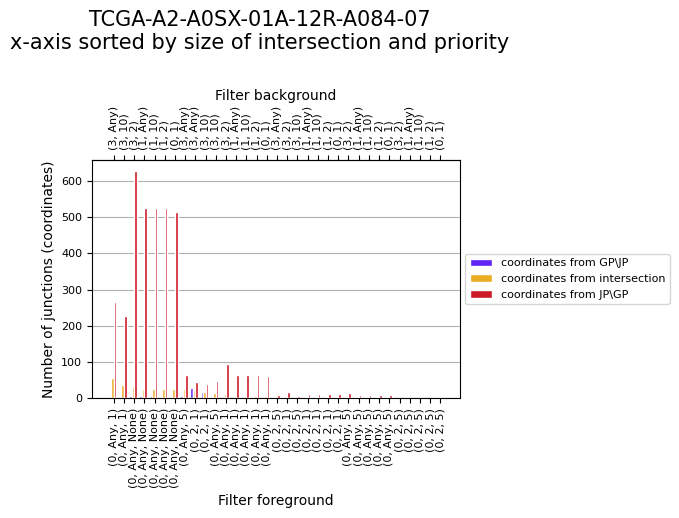

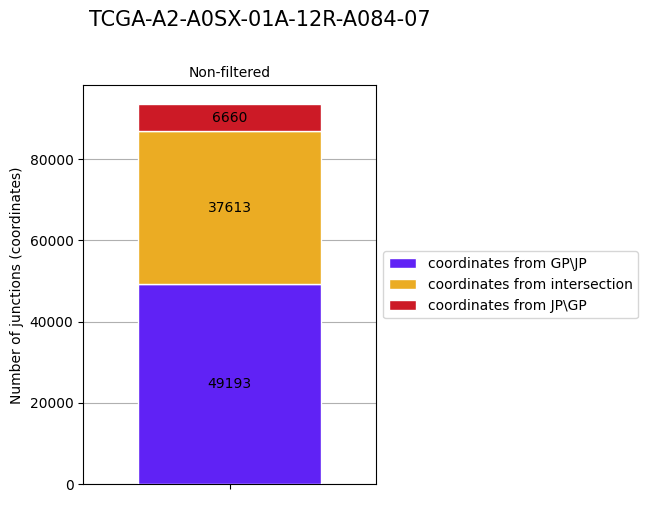

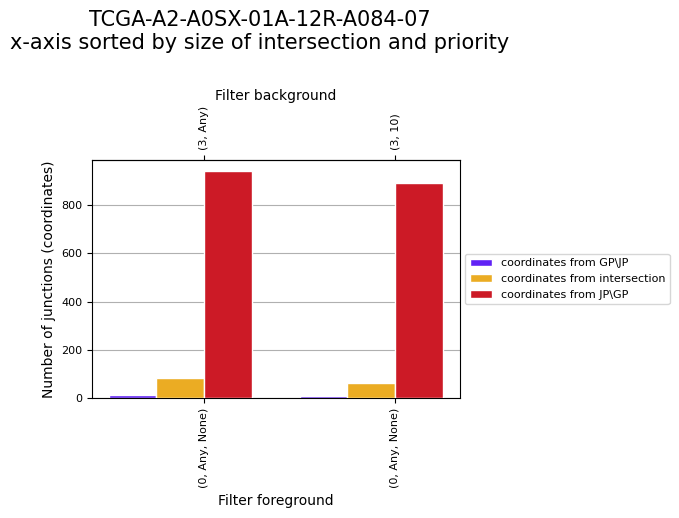

In [12]:
import matplotlib
matplotlib.rcParams.update({'font.size':4})
# Definition constants
import math

first_df=out_df_filtered
second_df=out_df_original

final_df = first_df
final_path = create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_BRCA,NAME_TABLES,'OHSU_BRCA_NEW',NAME_FINAL_BRCA])

final_df.to_csv(final_path,header=True,sep='\t')
diff_tab=pd.DataFrame()
# Processing data and drawing grahs for each sample
for sample in RESTRICTS_BRCA:
    
    # Download colums from tables
    data_df=final_df.loc[final_df['sample']==sample]
    data1_df = data_df.loc[final_df['sum']<800]
    data2_df = data_df.loc[final_df['sum']>=800]
    data1_df=table_processing.sorting(data1_df)
    data2_df=table_processing.sorting(data2_df)
    inter_first=list(data1_df['size_intersection_coor'])
    s_ETH_first=list(data1_df['size_eth\ohsu_coor'])
    s_OHSU_first=list(data1_df['size_ohsu\eth_coor'])
    filter_foreground_first = list(data1_df['filter_foreground'])
    filter_background_first = list(data1_df['filter_background'])
    
    inter2=list(second_df['size_intersection_coor'].loc[(second_df['sample']==sample)])
    s_ETH2=list(second_df['size_eth\ohsu_coor'].loc[(second_df['sample']==sample)])
    s_OHSU2=list(second_df['size_ohsu\eth_coor'].loc[(second_df['sample']==sample)])
    filfor2 = ['']
    filbac2 = ['']
    if STORY_OF_FILTER_COOR == 'intersection':
        inter2_df=out_df_original['inter_coor'].loc[(out_df_original['sample']==sample)]
        name='Intersection'
    elif STORY_OF_FILTER_COOR == 'ohsu':
        inter2_df=out_df_original['ohsu_coor\eth_coor'].loc[(out_df_original['sample']==sample)]
        name ='OHSU/ETH'
        # # Get data to compare 
    inter2_df=out_df_original['inter_coor'].loc[(out_df_original['sample']==sample)]
    OHSU_2_df=out_df_original['ohsu_coor\eth_coor'].loc[(out_df_original['sample']==sample)]
    ETH_2_df=out_df_original['eth_coor\ohsu_coor'].loc[(out_df_original['sample']==sample)]
    inter_nf=inter2_df.iloc[0]
    ohsu_nf=OHSU_2_df.iloc[0]
    eth_nf=ETH_2_df.iloc[0]
    inter_nf=inter_nf.replace('"','').replace("[","").replace("]","").replace("'","").replace("{","").replace("}","").split(', ')
    ohsu_nf=ohsu_nf.replace('"','').replace("[","").replace("]","").replace("'","").replace("{","").replace("}","").split(', ')
    eth_nf=eth_nf.replace('"','').replace("[","").replace("]","").replace("'","").replace("{","").replace("}","").split(', ')



    inter_second=list(data2_df['size_intersection_coor'])
    s_ETH_second=list(data2_df['size_eth\ohsu_coor'])
    s_OHSU_second=list(data2_df['size_ohsu\eth_coor'])
    filter_foreground_second = list(data2_df['filter_foreground'])
    filter_background_second = list(data2_df['filter_background'])
    
    ySalt=''
    OSHU=out_df_filtered['ohsu_coor\eth_coor'].loc[(out_df_filtered['sample']==sample)]
    ETH=out_df_filtered['eth_coor\ohsu_coor'].loc[(out_df_filtered['sample']==sample)]
    
    len_ohsu = [len(ohsu_list) for ohsu_list in OSHU]

    # Get data to compare
    f=final_df.loc[(final_df['sample']==sample)]['filter']
    #NF-non-filtered
    tab={
         'sample':[],
         'filter':[],
         'JP from Inter NF':[],
         'JP from JP NF':[],
         'GP from Inter NF':[],
         'GP from GP NF':[],
         'ff':final_df.loc[final_df['sample']==sample]['filter_foreground'],
         'fb':final_df.loc[final_df['sample']==sample]['filter_background'],
         }
    # Conver Aray in DF to DF structure and compare intersection coordinates in filter with intersection coordinates without filter
    for ohsu, filter in zip(OSHU, f):
        ohsu=ohsu.replace('"','').replace("{","").replace("}","").replace("[","").replace("]","").replace("'","").split(', ')
        # print("FFF ",len(inter_nf), len(ohsu))
        inter_d=len(inter_d_set:=(set(ohsu) & set(inter_nf)))
        ohsu_d=len(ohsu_d_set:=(set(ohsu) & set(ohsu_nf)))
        ohsu_out=list(set(ohsu).difference(inter_d_set))
        inter_out=list(set(ohsu).difference(ohsu_d_set))
        tab['sample'].append(sample)
        tab['filter'].append(filter)
        tab['JP from Inter NF'].append(inter_d)
        tab['JP from JP NF'].append(ohsu_d)
        salt=set(ohsu).difference(set(ohsu_nf))
        # print(f'SALT {salt.difference(set(inter_nf))}')
        # print(f'Came from OHSU Inter non-filtered {filter}:\n{inter_d}\nCame from OHSU non-filtered {filter}:\n{ohsu_d}\n')
    
    for eth, filter in zip(ETH, f):
        eth=eth.replace('"','').replace("}","").replace("{","").replace("[","").replace("]","").replace("'","").split(', ')
        # print("OOO ",len(inter_nf), len(eth))
        inter_d=len(inter_d_set:=(set(eth) & set(inter_nf)))
        eth_d=len(eth_d_set:=(set(eth) & set(eth_nf)))
        eth_out=list(set(eth).difference(inter_d_set))
        inter_out=list(set(eth).difference(eth_d_set))
        tab['GP from Inter NF'].append(inter_d)
        tab['GP from GP NF'].append(eth_d)
        salt=set(eth).difference(set(eth_nf))
        # print(f'SALT {salt.difference(set(inter_nf))}')
        # print(f'Came from ETH Inter non-filtered {filter}:\n{inter_d}\nCame from ETH non-filtered {filter}:\n{eth_d}\n')
    tab=pd.DataFrame(tab)
    diff_tab=pd.concat([diff_tab,tab])
    
    l_first=len(s_ETH_first)
    l_second=len(s_ETH_second)
    filfor_first = table_processing.get_filter(filter_foreground_first)
    filbac_first = table_processing.get_filter(filter_background_first)
    filfor_second = table_processing.get_filter(filter_foreground_second)
    filbac_second = table_processing.get_filter(filter_background_second)

            
    # Combining filters for graph indexing
    
    fffb_first=[]
    for i in range(len(filfor_first)):
          fffb_first.append(filfor_first[i]+' '+filbac_first[i])
       
    fffb2=[]
    for i in range(len(filfor2)):
          fffb2.append(filfor2[i]+' '+filbac2[i])

    fffb_second=[]
    for i in range(len(filfor_second)):
          fffb_second.append(filfor_second[i]+' '+filbac_second[i])

    
    # Frame structure building
    name = ['coordinates from GP\JP','coordinates from intersection','coordinates from JP\GP']

    v_first= [s_ETH_first,inter_first, s_OHSU_first]
    v_second=[s_ETH_second,inter_second,s_OHSU_second]

    
    axis2 = {
            'coordinates from GP\JP':s_ETH2,
            'coordinates from intersection':inter2,
            'coordinates from JP\GP':s_OHSU2
            }
    
    lg_first = len(filfor_first)
    lg2 = len(filfor2)
    lg_second = len(filfor_second)
    #Plotting sample data
    
    x_main = filfor_first
    x_secondary_first = filbac_first
    x_secondary2 = filbac2
    x_secondary_second = filbac_second
    
    plt.figure()



    bottom_first =np.zeros(lg_first)
    bottom2 =np.zeros(lg2)
    bottom_second =np.zeros(lg_second)
    
    bar_width=0.5
    
    bar_position_ETH_first = range(len(s_ETH_first))
    bar_position_ETH2 = range(len(axis2['coordinates from GP\JP']))
    bar_position_ETH_second = range(len(s_ETH_second))

    SALT = salt = PLOT_SORT_BY
    path_sample_m1000 =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE, NAME_PLOT_ABSOLUT_PRETTY_M1000+PNG])
    path_sample_l1000 =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE, NAME_PLOT_ABSOLUT_PRETTY_L1000+PNG])
    path_sample_nf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE, NAME_PLOT_ABSOLUT_PRETTY_NF+PNG])
    path_sample_m1000_pdf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE, NAME_PLOT_ABSOLUT_PRETTY_M1000+PDF])
    path_sample_l1000_pdf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE, NAME_PLOT_ABSOLUT_PRETTY_L1000+PDF])
    path_sample_nf_pdf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE, NAME_PLOT_ABSOLUT_PRETTY_NF+PDF])

    draw_plot.plotting_filtering_barplot(fffb_first,v_first,name,bottom_first,bar_position_ETH_first,sample,filfor_first,x_secondary_first,salt,path_sample_m1000,path_sample_m1000_pdf)
    
    draw_plot.plotting_nf_barplot(axis2,fffb2,bottom2,sample,path_sample_nf,path_sample_nf_pdf)

    draw_plot.plotting_filtering_barplot(fffb_second,v_second,name,bottom_second,bar_position_ETH_second,sample,filfor_second,x_secondary_second,salt,path_sample_l1000,path_sample_l1000_pdf)


    size_intersection_coor  size_eth\ohsu_coor  size_ohsu\eth_coor
0                        3                   1                  11
2                       28                   2                  42
3                        4                  10                  20
6                       10                   3                  67
8                       57                   8                 275
9                        1                   1                   2
10                      16                   1                  33
11                      21                  25                  42
12                       6                   2                   5
13                      44                   7                 232
14                       4                  10                  20
15                       9                  13                  26
16                       4                  10                  20
17                       3                   1                

/cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func/functions/table_processing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(['size_intersection', 'priority'], inplace = True,ascending = [False, True])


<Figure size 640x480 with 0 Axes>

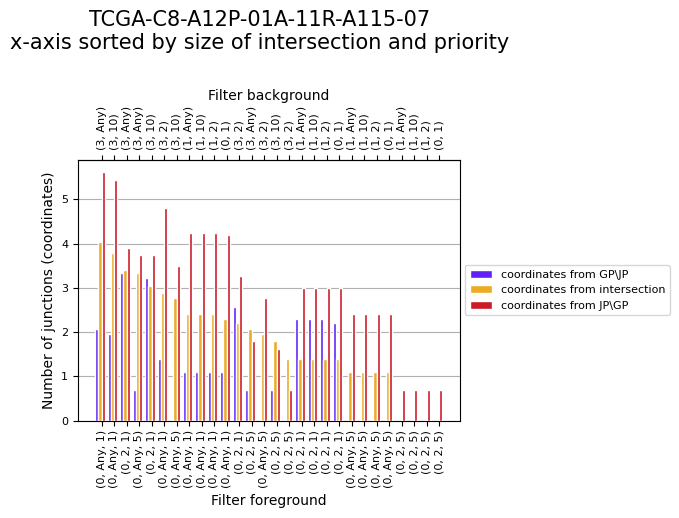

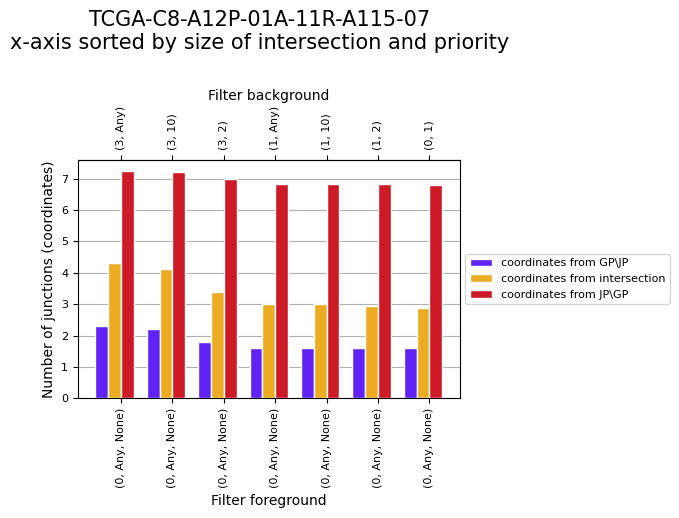

    size_intersection_coor  size_eth\ohsu_coor  size_ohsu\eth_coor
35                       4                   2                  25
36                      42                  15                 436
37                       0                   0                   0
38                      42                  15                 436
39                      42                  15                 436
40                       0                   1                   1
41                      27                   7                  89
42                      83                  19                 591
43                      10                   3                  14
44                      95                  19                 612
45                       2                   2                   5
46                       6                   1                  11
47                       2                   2                   5
48                       2                   0                

/cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func/functions/table_processing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(['size_intersection', 'priority'], inplace = True,ascending = [False, True])
/cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/scipy-stack/2023b/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 640x480 with 0 Axes>

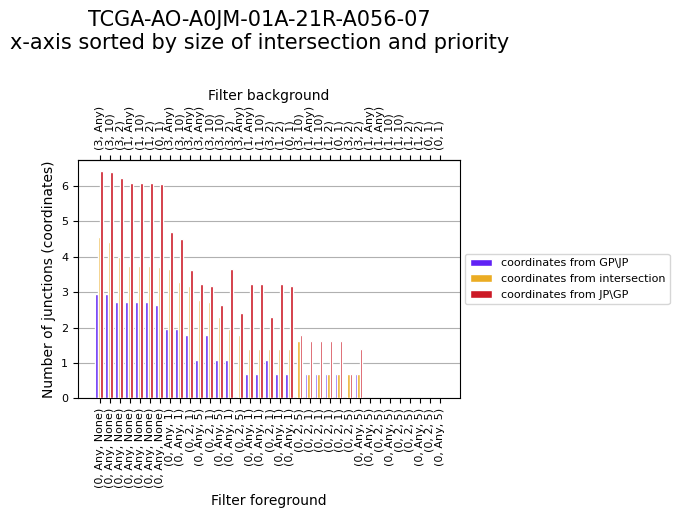

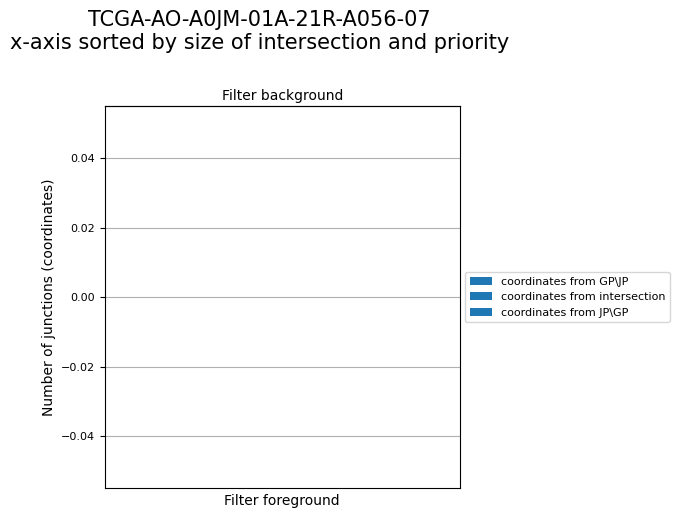

     size_intersection_coor  size_eth\ohsu_coor  size_ohsu\eth_coor
70                        5                   6                  16
71                        0                   0                   0
72                        0                   0                   0
73                        0                   0                   0
75                        5                   7                  17
76                        8                   0                  15
77                       22                  30                  38
79                       22                   7                 565
80                        2                   0                  11
81                       22                   7                 565
82                       10                   4                  77
83                       21                   7                 556
84                        2                   0                  11
85                        2                   0 

/cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func/functions/table_processing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(['size_intersection', 'priority'], inplace = True,ascending = [False, True])
/cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/scipy-stack/2023b/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 640x480 with 0 Axes>

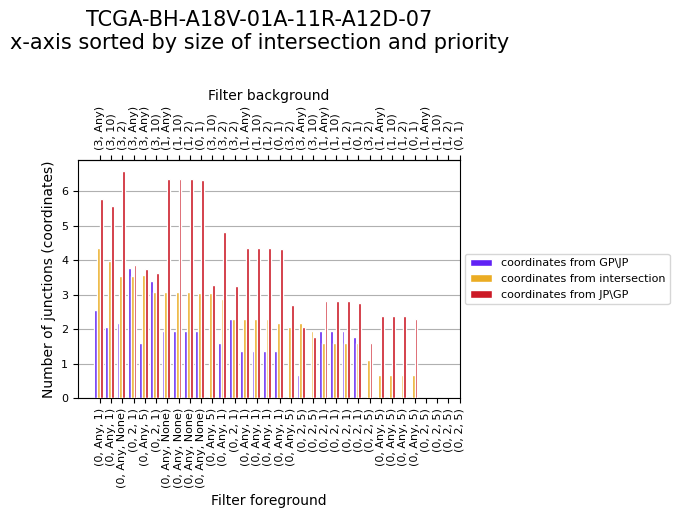

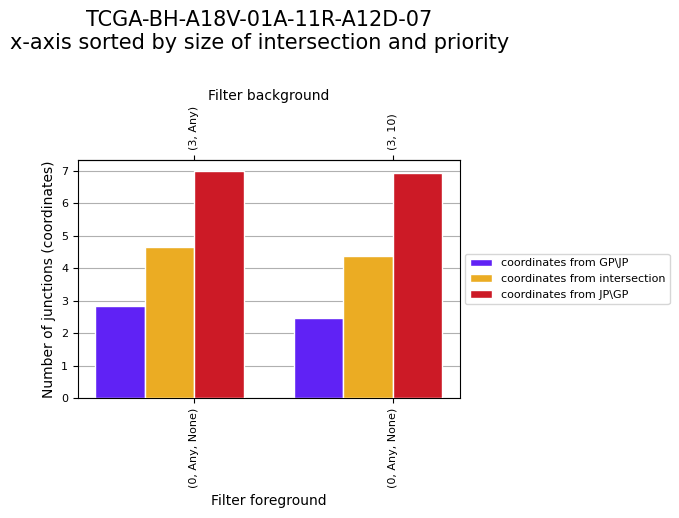

     size_intersection_coor  size_eth\ohsu_coor  size_ohsu\eth_coor
105                       1                   0                   6
106                       1                   0                  11
107                       1                   0                   6
108                      12                   3                 550
109                       4                   0                   8
110                      60                   3                 272
111                       3                   2                  15
112                      32                  24                  40
113                       2                   0                  11
114                       5                   0                  64
115                      20                   2                  37
116                      12                   3                 550
117                       1                   0                   6
118                       1                   0 

/cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func/functions/table_processing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(['size_intersection', 'priority'], inplace = True,ascending = [False, True])
/cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/scipy-stack/2023b/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 640x480 with 0 Axes>

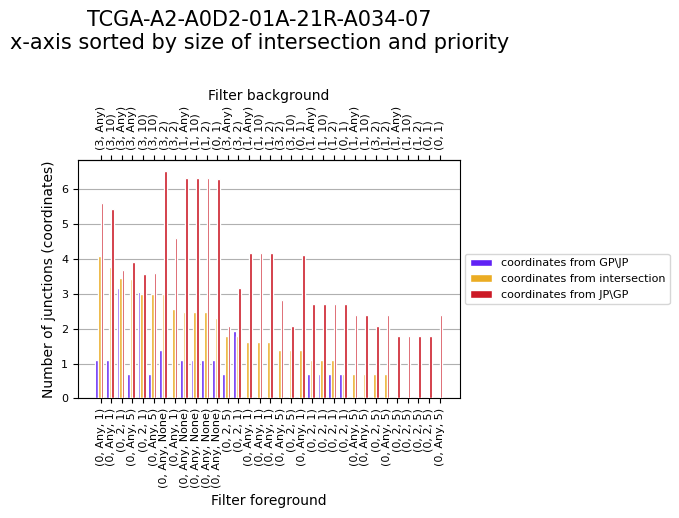

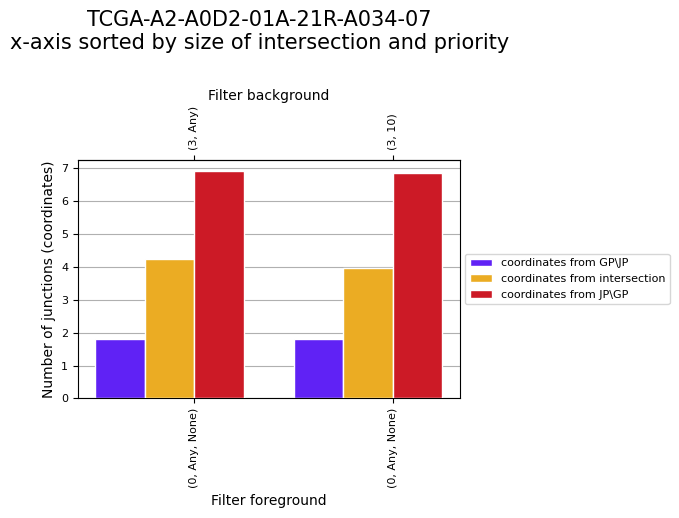

     size_intersection_coor  size_eth\ohsu_coor  size_ohsu\eth_coor
140                       8                   2                  64
141                       2                   1                   2
142                       3                   2                  10
144                      26                   6                  66
145                      26                   6                 526
146                       6                   1                   7
147                      15                   3                  48
148                       5                   4                  12
149                      23                  30                  46
150                      19                  17                  40
151                       5                   2                  16
152                       1                   1                   2
153                       1                   1                   2
154                       1                   1 

/cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func/functions/table_processing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(['size_intersection', 'priority'], inplace = True,ascending = [False, True])


<Figure size 640x480 with 0 Axes>

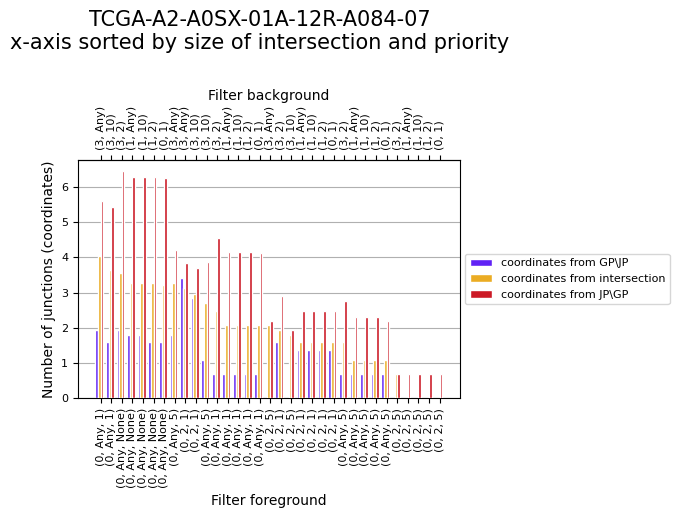

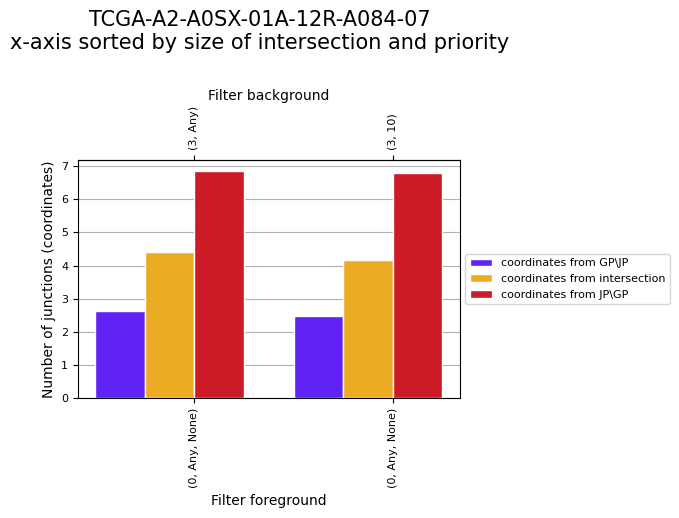

In [16]:
### WITH LOG
import matplotlib
matplotlib.rcParams.update({'font.size':4})
# Definition constants
import math

first_df=out_df_filtered
second_df=out_df_original

final_df = first_df
final_path = create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_BRCA,NAME_TABLES,'OHSU_BRCA_NEW',NAME_FINAL_BRCA])

final_df.to_csv(final_path,header=True,sep='\t')
diff_tab=pd.DataFrame()
# Processing data and drawing grahs for each sample
for sample in RESTRICTS_BRCA:
    
    # Download colums from tables
    data_df=final_df.loc[final_df['sample']==sample]
    data1_df = data_df.loc[final_df['sum']<800]
    data2_df = data_df.loc[final_df['sum']>=800]
    print(data1_df[['size_intersection_coor','size_eth\ohsu_coor','size_ohsu\eth_coor']])
    data1_df=table_processing.sorting(data1_df)
    data2_df=table_processing.sorting(data2_df)
    inter_first=np.log(data1_df['size_intersection_coor'])
    s_ETH_first=np.log(data1_df['size_eth\ohsu_coor'])
    s_OHSU_first=np.log(data1_df['size_ohsu\eth_coor'])
    filter_foreground_first = list(data1_df['filter_foreground'])
    filter_background_first = list(data1_df['filter_background'])

    inter_second=np.log(data2_df['size_intersection_coor'])
    s_ETH_second=np.log(data2_df['size_eth\ohsu_coor'])
    s_OHSU_second=np.log(data2_df['size_ohsu\eth_coor'])
    filter_foreground_second = list(data2_df['filter_foreground'])
    filter_background_second = list(data2_df['filter_background'])
    
    ySalt=''
    
    l_first=len(s_ETH_first)
    l_second=len(s_ETH_second)
    filfor_first = table_processing.get_filter(filter_foreground_first)
    filbac_first = table_processing.get_filter(filter_background_first)
    filfor_second = table_processing.get_filter(filter_foreground_second)
    filbac_second = table_processing.get_filter(filter_background_second)

            
    # Combining filters for graph indexing
    
    fffb_first=[]
    for i in range(len(filfor_first)):
          fffb_first.append(filfor_first[i]+' '+filbac_first[i])
       

    fffb_second=[]
    for i in range(len(filfor_second)):
          fffb_second.append(filfor_second[i]+' '+filbac_second[i])

    
    # Frame structure building
    name = ['coordinates from GP\JP','coordinates from intersection','coordinates from JP\GP']

    v_first= [s_ETH_first,inter_first, s_OHSU_first]
    print(v_first)
    v_second=[s_ETH_second,inter_second,s_OHSU_second]

    
    lg_first = len(filfor_first)
    lg_second = len(filfor_second)
    #Plotting sample data
    
    x_main = filfor_first
    x_secondary_first = filbac_first
    x_secondary_second = filbac_second
    
    plt.figure()



    bottom_first =np.zeros(lg_first)
    bottom_second =np.zeros(lg_second)
    
    bar_width=0.5
    
    bar_position_ETH_first = range(len(s_ETH_first))
    bar_position_ETH_second = range(len(s_ETH_second))

    SALT = salt = PLOT_SORT_BY
    path_sample_m1000 =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE, LOGTHM, NAME_PLOT_ABSOLUT_PRETTY_M1000+PNG])
    path_sample_l1000 =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE,LOGTHM, NAME_PLOT_ABSOLUT_PRETTY_L1000+PNG])
    path_sample_m1000_pdf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE,LOGTHM, NAME_PLOT_ABSOLUT_PRETTY_M1000+PDF])
    path_sample_nf_pdf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE,LOGTHM, NAME_PLOT_ABSOLUT_PRETTY_NF+PDF])

    draw_plot.plotting_filtering_barplot(fffb_first,v_first,name,bottom_first,bar_position_ETH_first,sample,filfor_first,x_secondary_first,salt,path_sample_m1000,path_sample_m1000_pdf)
    

    draw_plot.plotting_filtering_barplot(fffb_second,v_second,name,bottom_second,bar_position_ETH_second,sample,filfor_second,x_secondary_second,salt,path_sample_l1000,path_sample_l1000_pdf)


In [6]:
diff_tab.to_csv('story_of_coords.csv')

<Figure size 640x480 with 0 Axes>

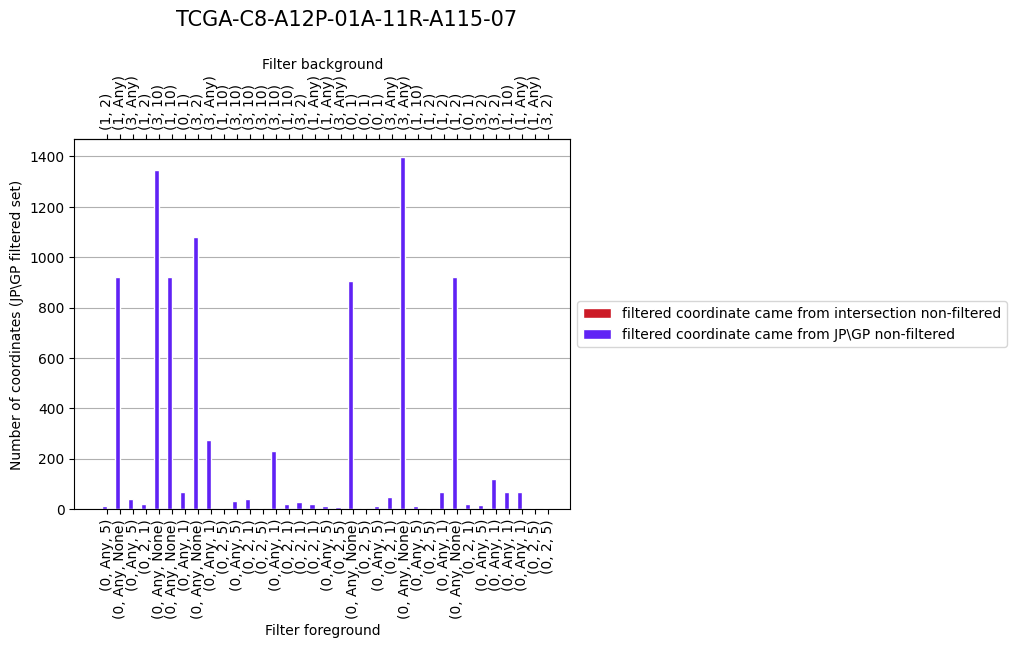

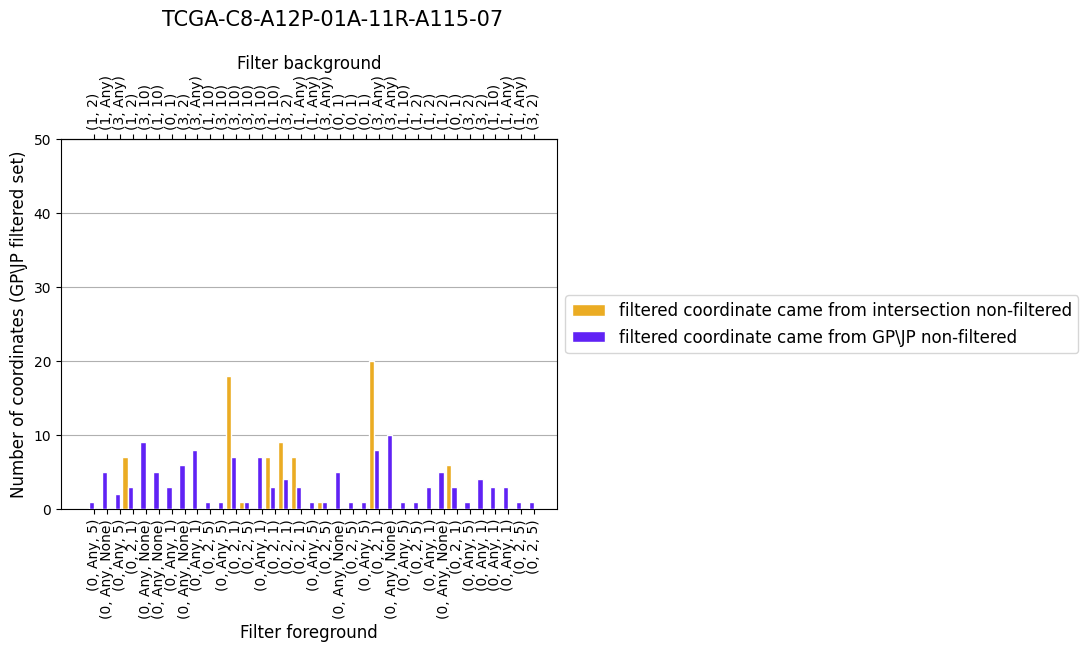

<Figure size 640x480 with 0 Axes>

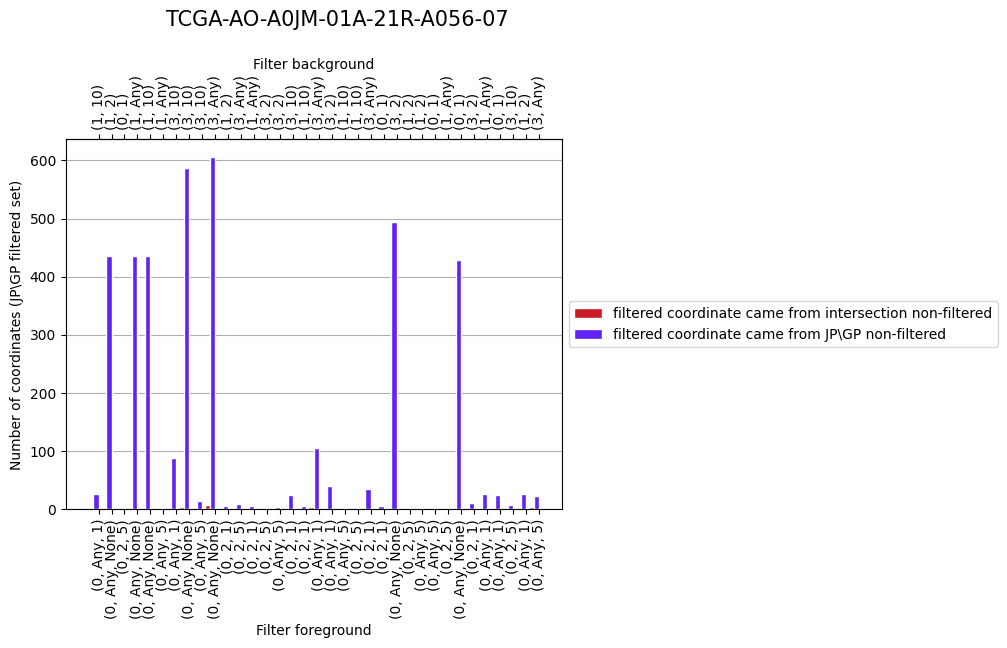

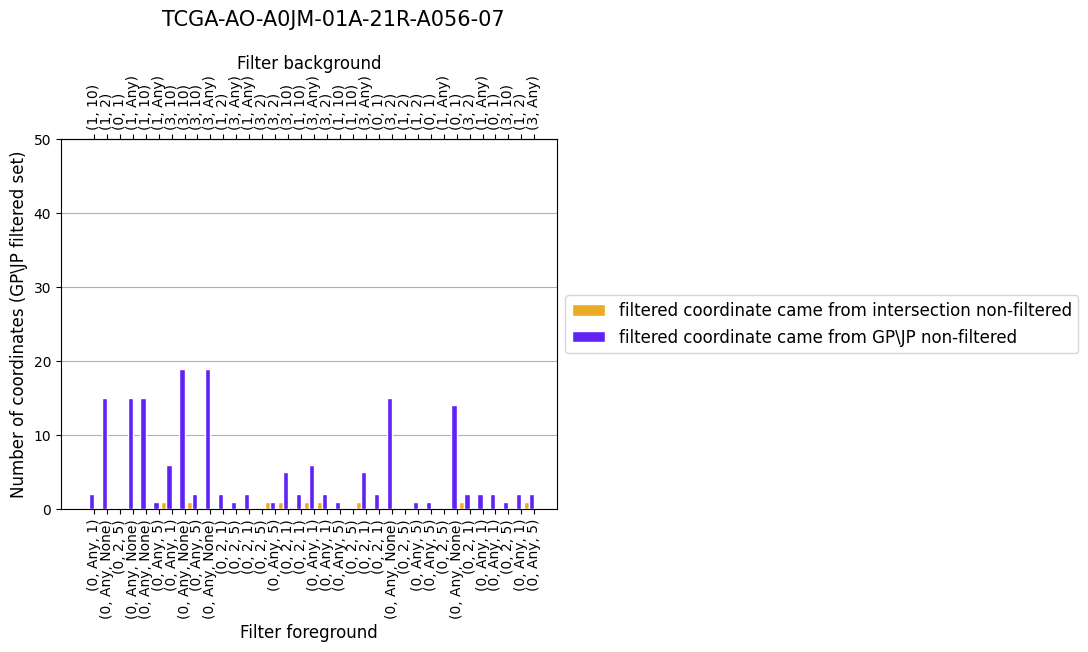

<Figure size 640x480 with 0 Axes>

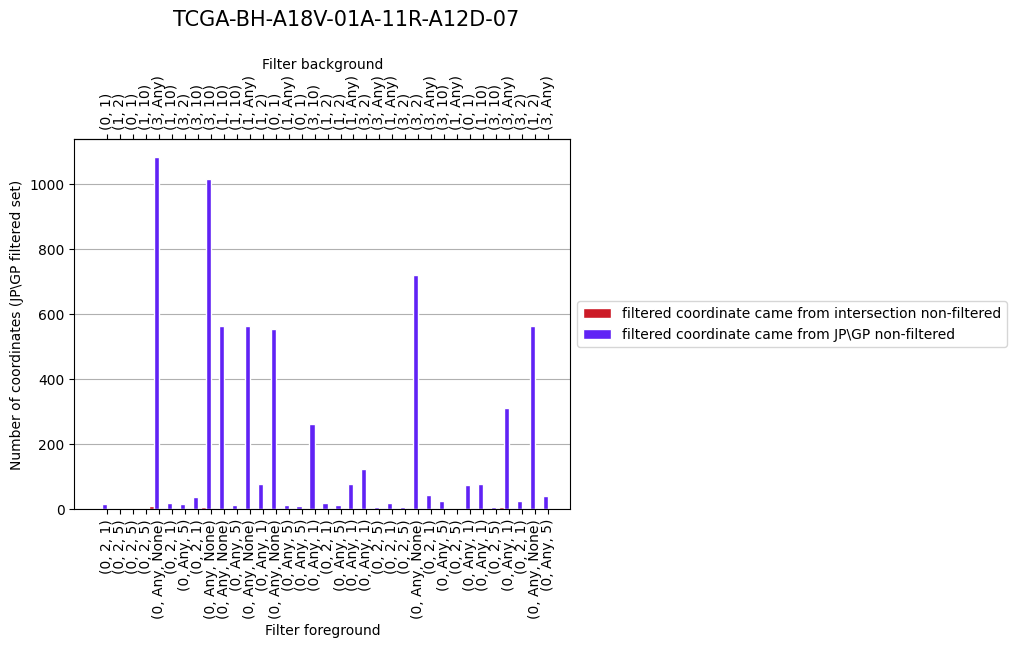

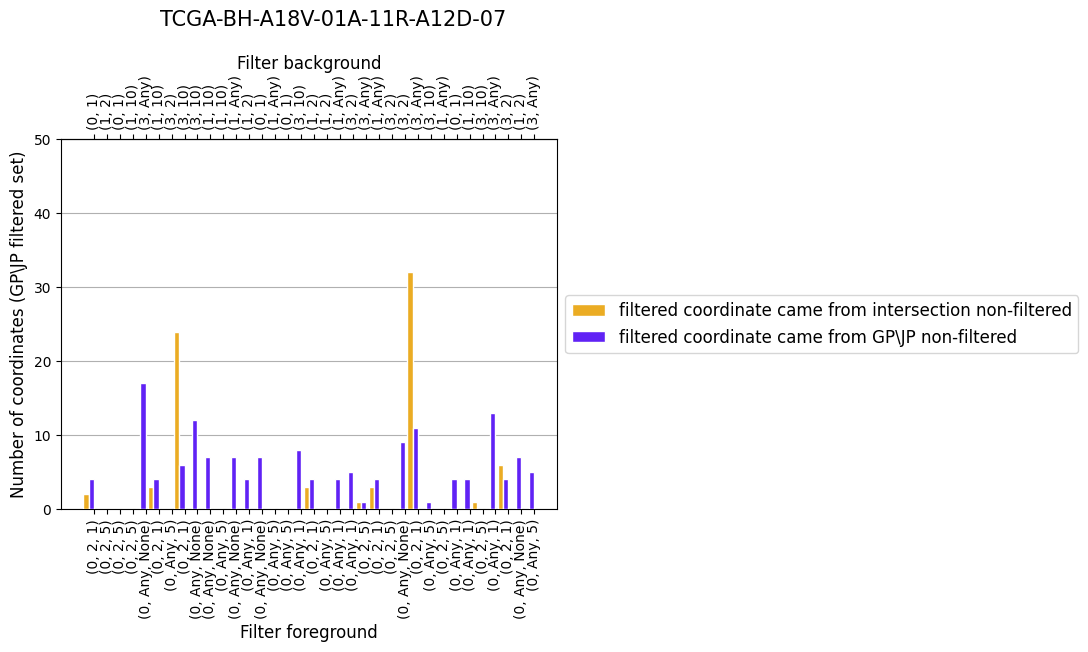

<Figure size 640x480 with 0 Axes>

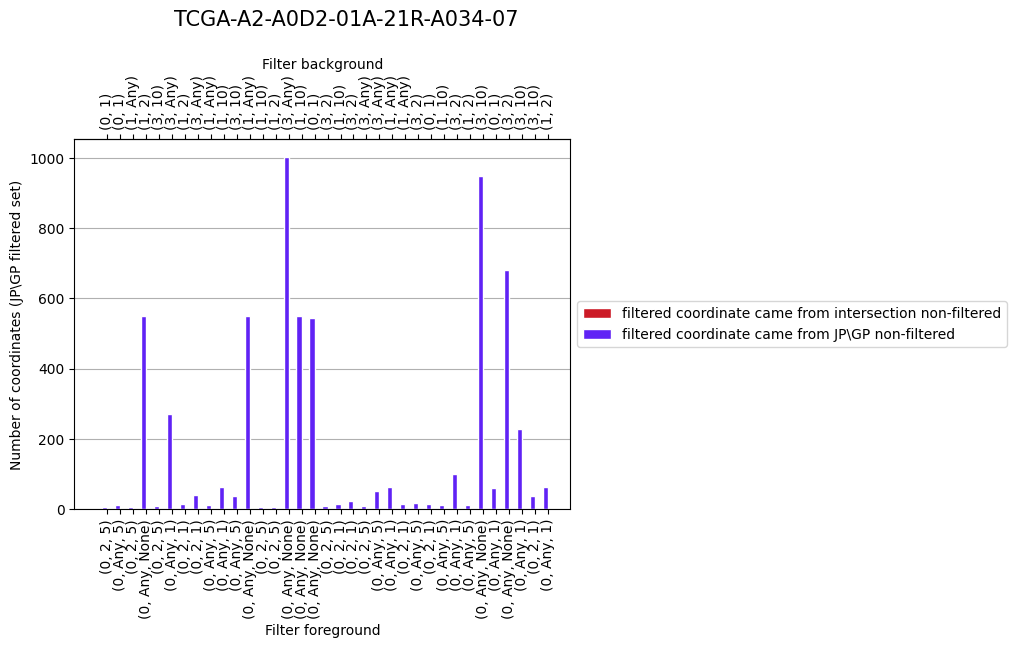

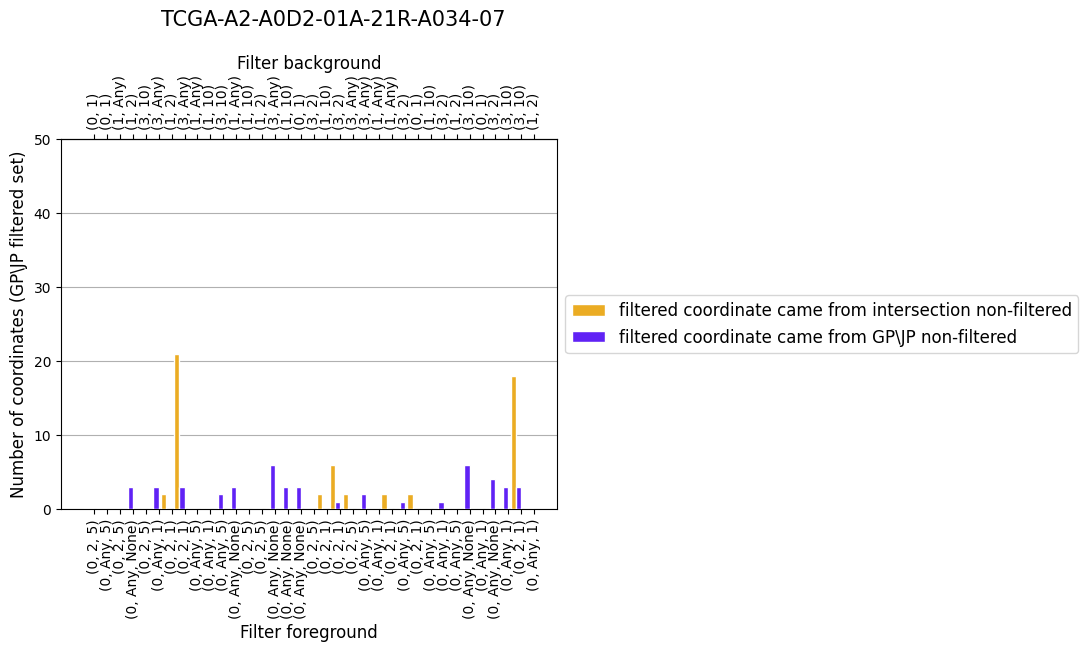

<Figure size 640x480 with 0 Axes>

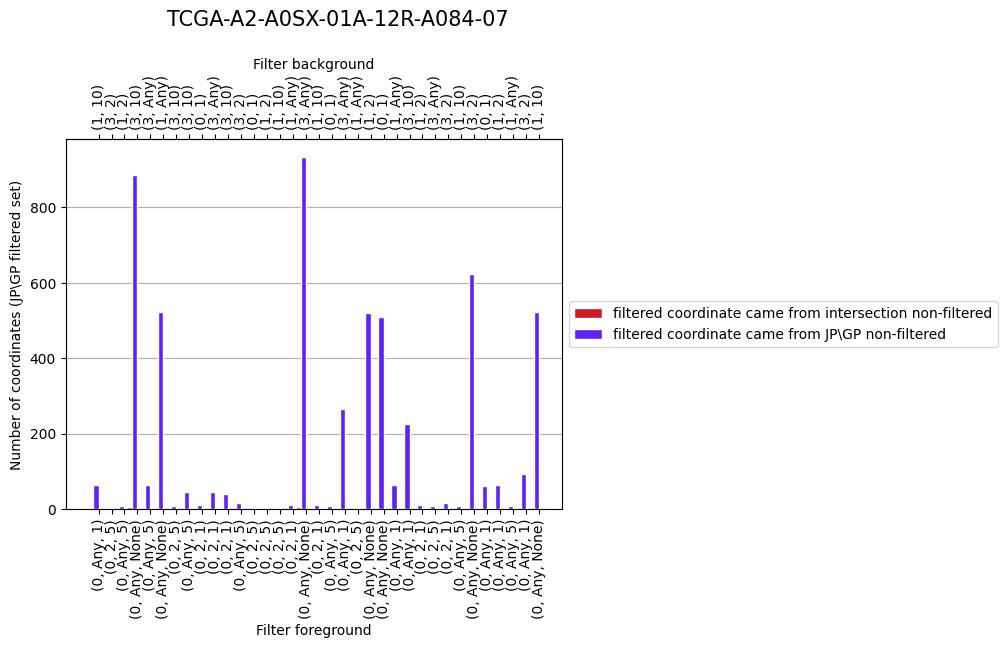

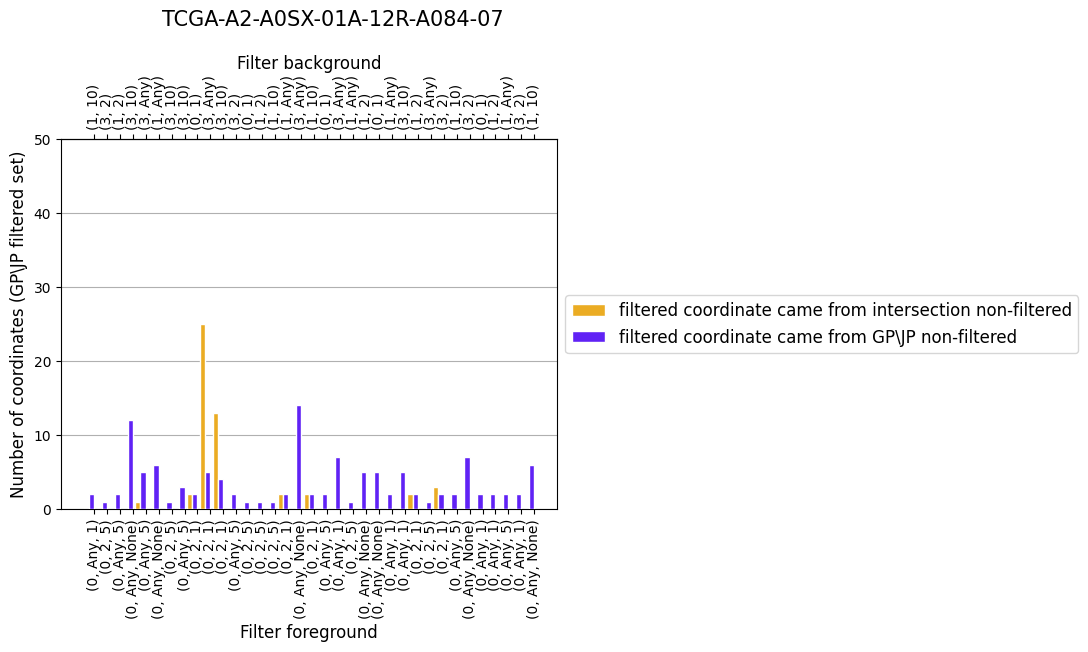

In [7]:
restricts = diff_tab['sample'].unique()
for sample in restricts:
    samples_table = diff_tab.loc[diff_tab['sample']==sample]
    FILTER=samples_table['filter']
    JP_INTER_NF=samples_table['JP from Inter NF']
    JP_JP_NF=samples_table['JP from JP NF']
    GP_INTER_NF=samples_table['GP from Inter NF']
    GP_GP_NF=samples_table['GP from GP NF']
    FF=samples_table['ff']
    FB=samples_table['fb']
    bar_position=range(len(FF))
    
    path_sample_JP =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE, NAME_PLOT_JP+PNG])
    path_sample_JP_pdf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE, NAME_PLOT_JP+PDF])
    path_sample_GP =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE, NAME_PLOT_GP+PNG])
    path_sample_GP_pdf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES, sample,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE, NAME_PLOT_GP+PDF])
        
    # print(filters)
    plt.figure()

    fig, ax1 = plt.subplots(nrows=1,ncols=1)
    bw=0.4
    p1 = ax1.bar(np.arange(len(FILTER))-bw,JP_INTER_NF,bw,label='filtered coordinate came from intersection non-filtered', edgecolor='white',color=(0.8,0.1,0.15),zorder=1)
    p1 = ax1.bar(np.arange(len(FILTER)),JP_JP_NF,bw,label='filtered coordinate came from JP\GP non-filtered', edgecolor='white',color='#6022F5',zorder=2)


    plt.suptitle('-'.join([sample[0:4], sample[4:6], sample[6:10], sample[10:13], sample[13:16], sample[16:20], sample[20:22]])+'\n',size=15,x=0.55,y=1.15)
    ax1.set_xticks([pos+bw/2 for pos in bar_position])
    ax1.set_xticklabels(FF,rotation=90,ha='center', fontsize=10)
    ax1.tick_params(labelsize=10)
    ax1.set_xlabel('Filter foreground',size=10)
    ax1.set_ylabel('Number of coordinates (JP\GP filtered set)',size=10)
    # ax1.set_title('Filtered',size=10)
    ax1.legend(fontsize=10,loc='center left',bbox_to_anchor=(1,0.5))
    ax1.grid(axis='y', zorder=0)

        
    # Add second axis
    ax_sec = ax1.secondary_xaxis('top')
    ax_sec.set_xticks([pos+bw/2 for pos in bar_position])
    ax_sec.set_xticklabels(FB,rotation=90,ha='center',fontsize=10)
    ax_sec.set_xlabel('Filter background',size=10)
    plt.savefig(path_sample_JP_pdf, dpi=300,bbox_inches='tight')
    plt.savefig(path_sample_JP, dpi=300,bbox_inches='tight')
    plt.show()

    fig, ax2 = plt.subplots(nrows=1,ncols=1)
    bw=0.4
    p1 = ax2.bar(np.arange(len(FILTER))-bw,GP_INTER_NF,bw,label='filtered coordinate came from intersection non-filtered', edgecolor='white',color='#ebac23',zorder=3)
    p1 = ax2.bar(np.arange(len(FILTER)),GP_GP_NF,bw,label='filtered coordinate came from GP\JP non-filtered', edgecolor='white',color='#6022F5',zorder=3)
    plt.suptitle('-'.join([sample[0:4], sample[4:6], sample[6:10], sample[10:13], sample[13:16], sample[16:20], sample[20:22]]),size=15,x=0.55,y=1.15)
    ax2.set_xticks([pos+bw/2 for pos in bar_position])
    ax2.set_xticklabels(FF,rotation=90,ha='center', fontsize=10)
    ax2.tick_params(labelsize=10)
    ax2.set_xlabel('Filter foreground',size=12)
    ax2.set_ylabel('Number of coordinates (GP\JP filtered set)',size=12)
    ax2.legend(fontsize=12,loc='center left',bbox_to_anchor=(1,0.5))
    ax2.grid(axis='y', zorder=0)
    ax2.set_ylim([0,50])

        
    # Add second axis
    ax_sec2 = ax2.secondary_xaxis('top')
    ax_sec2.set_xticks([pos+bw/2 for pos in bar_position])
    ax_sec2.set_xticklabels(FB,rotation=90,ha='center',fontsize=10)
    ax_sec2.set_xlabel('Filter background',size=12)
    plt.savefig(path_sample_GP_pdf, dpi=300,bbox_inches='tight')
    plt.savefig(path_sample_GP, dpi=300,bbox_inches='tight')
    plt.show()

In [8]:
data_fil=out_df_filtered
data_nf=out_df_original
OSHU=data_fil['ohsu_coor\eth_coor'].loc[(out_df_filtered['sample']=='TCGAAOA0JM01A21RA05607')]
ETH=data_fil['eth_coor\ohsu_coor'].loc[(out_df_filtered['sample']=='TCGAAOA0JM01A21RA05607')]
inter2_df=data_nf['inter_coor'].loc[(out_df_original['sample']=='TCGAAOA0JM01A21RA05607')]
OHSU_2_df=data_nf['ohsu_coor\eth_coor'].loc[(out_df_original['sample']=='TCGAAOA0JM01A21RA05607')]
ETH_2_df=data_nf['eth_coor\ohsu_coor'].loc[(out_df_original['sample']=='TCGAAOA0JM01A21RA05607')]
inter_nf=inter2_df.iloc[0]
ohsu_nf=OHSU_2_df.iloc[0]
eth_nf=ETH_2_df.iloc[0]
inter_nf=inter_nf.replace('"','').replace("[","").replace("]","").replace("'","").split(', ')
ohsu_nf=ohsu_nf.replace('"','').replace("{","").replace("}","").replace("'","").split(', ')
eth_nf=eth_nf.replace('"','').replace("{","").replace("}","").replace("'","").split(', ')
len_ohsu = [ohsu_list.replace('"','').replace("{","").replace("}","").replace("'","").split(', ') for ohsu_list in OSHU]
len_eth = [eth_list.replace('"','').replace("{","").replace("}","").replace("'","").split(', ') for eth_list in ETH]
for ohsu in len_ohsu:
    print(f"len ohsu {len(ohsu)},\tfrom OHSU NF{len(set(ohsu) & set(ohsu_nf))},\tfrom INTER NF {len(set(ohsu) & set(inter_nf))},\tfrom ETH NF {len(set(ohsu) & set(eth_nf))}")
print(TT)
for eth in len_eth:
    print(f"len eth {len(eth)},\tfrom OHSU NF {len(set(eth) & set(ohsu_nf))},\tfrom INTER NF {len(set(eth) & set(inter_nf))},\tfrom ETH NF {len(set(eth) & set(eth_nf))}")

len ohsu 25,	from OHSU NF25,	from INTER NF 0,	from ETH NF 0
len ohsu 436,	from OHSU NF435,	from INTER NF 1,	from ETH NF 0
len ohsu 1,	from OHSU NF0,	from INTER NF 0,	from ETH NF 0
len ohsu 436,	from OHSU NF435,	from INTER NF 1,	from ETH NF 0
len ohsu 436,	from OHSU NF435,	from INTER NF 1,	from ETH NF 0
len ohsu 1,	from OHSU NF1,	from INTER NF 0,	from ETH NF 0
len ohsu 89,	from OHSU NF87,	from INTER NF 2,	from ETH NF 0
len ohsu 591,	from OHSU NF587,	from INTER NF 4,	from ETH NF 0
len ohsu 14,	from OHSU NF13,	from INTER NF 1,	from ETH NF 0
len ohsu 612,	from OHSU NF606,	from INTER NF 6,	from ETH NF 0
len ohsu 5,	from OHSU NF5,	from INTER NF 0,	from ETH NF 0
len ohsu 11,	from OHSU NF9,	from INTER NF 2,	from ETH NF 0
len ohsu 5,	from OHSU NF5,	from INTER NF 0,	from ETH NF 0
len ohsu 2,	from OHSU NF2,	from INTER NF 0,	from ETH NF 0
len ohsu 4,	from OHSU NF4,	from INTER NF 0,	from ETH NF 0
len ohsu 24,	from OHSU NF24,	from INTER NF 0,	from ETH NF 0
len ohsu 5,	from OHSU NF5,	from INTER NF 0,